# Exploratory Data Analysis

----
### Things to Consider

**May need more than just 2020 to work with time series data**
- Consider downloading more data from prior years - try to keep it consistent with how much data you have per year
- Graph of sales by month

**May want to split the housing data into tiers**
- This would look like having a T1, T2, T3, T4 tier for each location and house size, etc. in order to separate the houses that need to be renovated versus the houses that are ready to move in
- Finding a way to take this into consideration will be tricky

----

In [33]:
%run src/imports.py

In [34]:
sns.set(rc={'figure.figsize':(16,4)})

In [35]:
df = pd.read_pickle('data/full.pkl')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37456 entries, 0 to 227
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   SALE TYPE                                                                                   37456 non-null  object 
 1   SOLD DATE                                                                                   37333 non-null  object 
 2   PROPERTY TYPE                                                                               37456 non-null  object 
 3   ADDRESS                                                                                     37438 non-null  object 
 4   CITY                                                                                        37454 non-null  object 
 5   STATE OR PROVINCE                        

## Data Cleaning To Be Done

~~- Take out 333k HOA listing(s)~~
- change datatypes
    - SOLD DATE to datetime
    - ZIP OR POSTAL CODE to category

In [37]:
df.drop(205,inplace=True)

<AxesSubplot:xlabel='SOLD DATE', ylabel='DAYS ON MARKET'>

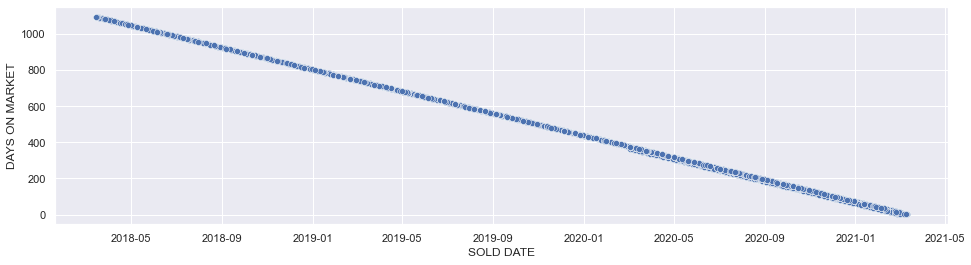

In [45]:
x_plot = df['SOLD DATE']
x_plot = pd.to_datetime(x_plot)
y_plot = df['DAYS ON MARKET']
sns.scatterplot(data=df, x=x_plot, y=y_plot)

In [44]:
pd.to_datetime(x_plot)

0     2020-10-15
1     2019-06-25
2     2019-05-24
3     2020-09-25
4     2020-06-11
         ...    
223   2020-03-16
224   2019-05-02
225   2020-08-28
226   2021-02-04
227   2019-12-05
Name: SOLD DATE, Length: 37357, dtype: datetime64[ns]

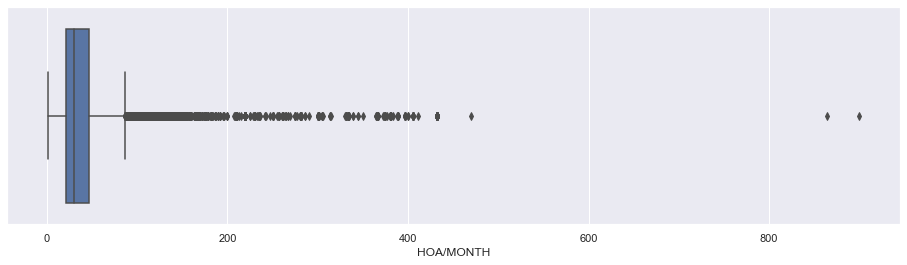

In [7]:
ax = sns.boxplot(x=df['HOA/MONTH'])

In [8]:
df['HOA/MONTH'].median()

30.0

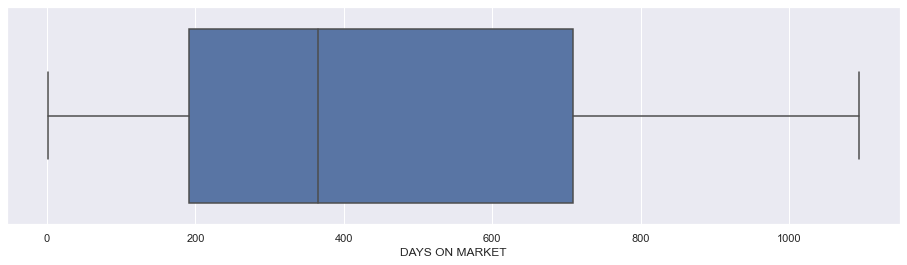

In [9]:
ax = sns.boxplot(x=df['DAYS ON MARKET'])

count    37337.000000
mean         3.422075
std          0.737541
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: BEDS, dtype: float64

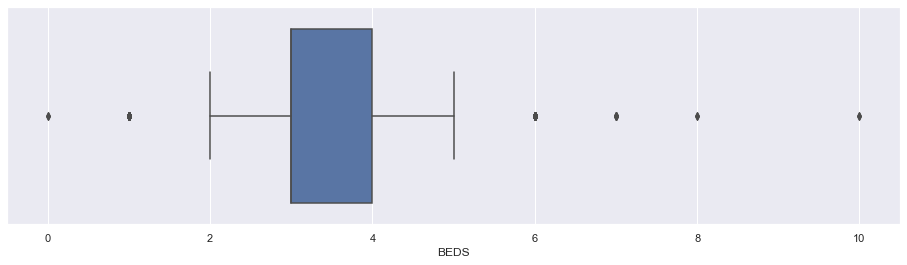

In [10]:
ax = sns.boxplot(x=df['BEDS'])
df['BEDS'].describe()

count    37331.000000
mean         2.413570
std          0.812034
min          0.500000
25%          2.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: BATHS, dtype: float64

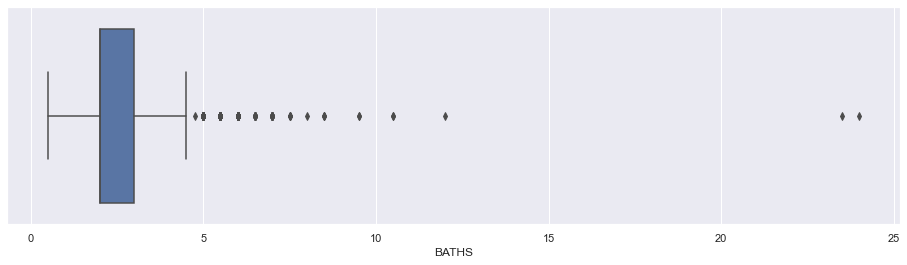

In [11]:
ax = sns.boxplot(x=df['BATHS'])
df['BATHS'].describe()

In [30]:
df[df['BATHS'] == 7.5]

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
18,PAST SALE,December-30-2019,Single Family Residential,326 Branch Oak Way,San Antonio,TX,78230,875000,4.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/Shavano-Park/326-Bran...,HARMLS,94445848.0,N,Y,29.569196,-98.556351
33,PAST SALE,December-4-2020,Single Family Residential,602 Bentley Mnr,Shavano Park,TX,78249,1825000,7.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/Shavano-Park/602-Bent...,Sabor,1355770.0,N,Y,29.589252,-98.567337
63,PAST SALE,July-31-2019,Single Family Residential,238 Winding Ln,Shavano Park,TX,78231,2600000,5.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/San-Antonio/238-Windi...,Sabor,1362491.0,N,Y,29.598340,-98.550515
275,PAST SALE,February-12-2021,Single Family Residential,11661 Elm Ridge Rd,San Antonio,TX,78230,920000,6.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/San-Antonio/11661-Elm...,Sabor,1496163.0,N,Y,29.547869,-98.549656


In [31]:
df['SOLD DATE'] = pd.to_datetime(df['SOLD DATE'])

<AxesSubplot:xlabel='SOLD DATE', ylabel='Count'>

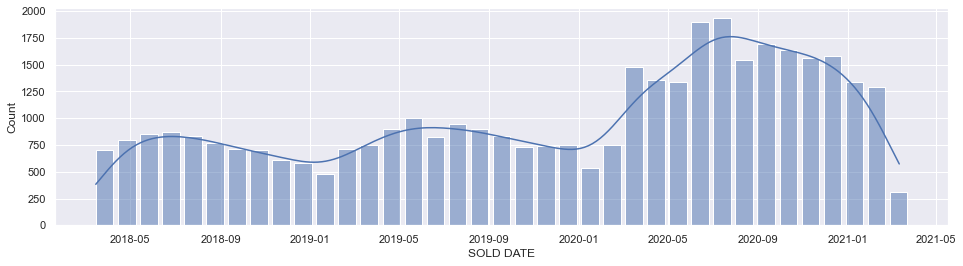

In [32]:
sns.histplot(data=df['SOLD DATE'],binwidth=30,kde=True,shrink=0.8)

In [45]:
# Choropleth map of house locations???

In [33]:
# stacked bar of months

In [52]:
df.reset_index(inplace=True)

In [59]:
df['MONTH'] = pd.DatetimeIndex(df['SOLD DATE']).month

In [63]:
df.dropna(inplace=True)

In [64]:
df['MONTH'] = df['MONTH'].astype(int)

In [66]:
df

,index,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,...,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,MLS#,LATITUDE,LONGITUDE,MONTH
0,0,PAST SALE,2020-10-15,Single Family Residential,17751 Rancho Diana,San Antonio,TX,78255,955000,4.0,...,33976.0,2019.0,150.0,195.0,55.0,Sold,1430151.0,29.612013,-98.654187,10
1,1,PAST SALE,2019-06-25,Single Family Residential,18010 Granite Hill Dr,San Antonio,TX,78255,670000,6.0,...,20908.0,2008.0,628.0,149.0,50.0,Sold,1369710.0,29.612978,-98.654429,6
2,2,PAST SALE,2019-05-24,Single Family Residential,7827 Hermosa Hl,San Antonio,TX,78256,465000,5.0,...,7840.0,2010.0,660.0,128.0,82.0,Sold,1332273.0,29.646189,-98.638447,5
3,3,PAST SALE,2020-09-25,Single Family Residential,6702 Frua Ln,San Antonio,TX,78257,345000,2.0,...,5662.0,2005.0,170.0,173.0,230.0,Sold,1467693.0,29.647801,-98.614186,9
4,4,PAST SALE,2020-06-11,Single Family Residential,315 Persimmon Trl,San Antonio,TX,78256,337500,4.0,...,9583.0,2004.0,276.0,156.0,54.0,Sold,1451684.0,29.650304,-98.629082,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,223,PAST SALE,2020-03-16,Single Family Residential,1147 Hedgestone Dr,San Antonio,TX,78258,275000,4.0,...,5662.0,1986.0,363.0,122.0,110.0,Sold,1438057.0,29.646371,-98.497260,3
37353,224,PAST SALE,2019-05-02,Single Family Residential,25167 Flying Arrow,San Antonio,TX,78258,335000,5.0,...,7840.0,1994.0,682.0,136.0,16.0,Sold,1370938.0,29.644913,-98.494773,5
37354,225,PAST SALE,2020-08-28,Single Family Residential,25270 Flaming Arrow,San Antonio,TX,78258,335000,5.0,...,12196.0,1988.0,198.0,102.0,23.0,Sold,1466828.0,29.644785,-98.493958,8
37355,226,PAST SALE,2021-02-04,Single Family Residential,21610 Iron Ridge Ct,San Antonio,TX,78258,350000,3.0,...,7727.0,1999.0,38.0,150.0,38.0,Sold,1499022.0,29.643171,-98.503006,2


TypeError: no numeric data to plot